# Problem Description

Customer churn is a major problem for businesses in an environment where competitors are constantly endeavoring to retain their client base as well as wooing the business of new clients. Churn or attrition occurs when customers start viewing a competing company more favorably  and cease to do business with their present company. It is often said that, depending on the type of industry, acquiring a new customer is anywhere from five to 25 times more expensive than retaining an existing one. Therefore it makes sense for businesses of all kinds to understand their customers' behaviours using data and take appropriate actions in the face of emerging patterns heralding the departure of a body of valuable customers.

In this project, we are going to predict customer churn using the Telecom Dataset hosted by IBM Watson Analytics Community. Telecommunications is an industry in which subscribers have multiple competing businesses to choose from over their current company. We will be predicting churn using a variety of machine learning models. In keeping with our philosophy of trying the simplest approaches first, we will start with linear models such as Logistic Regression, Linear Discriminant Analysis, and Support Vector Machine with linear kernel. We will then move on to non-linear models including Decision Tree and Neural Network and culminate with some of the more complex models namely Gradient Boosting, Random Forest, and AdaBoost. So let’s get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

***

# Getting to Know the Data
So let's go ahead and have a look at our dataset and get to know what each column represents. Each row in our dataset represents a customer while each column contains data about a particular attribute of the customer.

In [2]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Let's quickly write a function to get some detailed info about the columns we want. We should be able to pass a dataset alongwith either a list_of_column_labels_or_indices or a range_of_columns.

In [4]:
def col_info(data=df, col_ids=None):
    '''
    The function takes a dataset and a list of columns supplied by the user. If only a dataset is passed, the function will default to providing info on all the columns. The columns are specified as either all "labels" or all indices and can be in any desired order. Column indices can be passed using either a range function (for a contiguous list of columns) or a simple list (for non-contiguous columns). If "labels" are specified, these are converted into indices by the function before use.\
    \n\nEXAMPLES: Suppose the dataset has 10 columns labeled "A" to "J". \n\nSo for all columns use:
    col_info(range(0, df.shape[1]))\n\nFor the first 6 columns use:
    col_info(range(0, 5))\n\nFor columns 1, 3, 7, and 8 use:
    col_info([1, 3, 7, 8])\n\nFor columns "A", "D" and "F" use:
    col_info(["A", "D", "F"])
    '''
    if col_ids is None:
        col_ids = range(0, data.shape[1])
    # if the list contains column names (strings) instead of indices:
    # check the 1st element only as all elements have the same type
    if type(col_ids[0]) == str:
        col_indices = [] # col_indices is the new list
        for col in col_ids: # for each column in the passed list
            index = data.columns.get_loc(col) # get column index
            col_indices.append(index) # append column index to list
    else: # if the list contains column indices
        col_indices = col_ids
    print("The full dataset contains:", data.shape[0], "rows and", \
          data.shape[1], "columns. Details for the requested columns", \
          "are as follows:\n")    
    for col in col_indices: # for each index in the new list
        print(data.columns[col], ": ", data.iloc[:,col].dtype, \
              data.iloc[:,col].unique(), ":", \
              len(data.iloc[:,col].unique()), "levels")

In [5]:
col_info(df)

The full dataset contains: 7043 rows and 21 columns. Details for the requested columns are as follows:

customerID :  object ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] : 7043 levels
gender :  object ['Female' 'Male'] : 2 levels
SeniorCitizen :  int64 [0 1] : 2 levels
Partner :  object ['Yes' 'No'] : 2 levels
Dependents :  object ['No' 'Yes'] : 2 levels
tenure :  int64 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] : 73 levels
PhoneService :  object ['No' 'Yes'] : 2 levels
MultipleLines :  object ['No phone service' 'No' 'Yes'] : 3 levels
InternetService :  object ['DSL' 'Fiber optic' 'No'] : 3 levels
OnlineSecurity :  object ['No' 'Yes' 'No internet service'] : 3 levels
OnlineBackup :  object ['Yes' 'No' 'No internet service'] : 3 levels
DeviceProtection :  object ['No' 

The raw data contains 7043 rows (customers) and 21 columns (features). We can see from the output of the col_info function that all the columns are object (string) type with the exception of SeniorCitizen and tenure which are integer type, and MonthlyCharges and TotalCharges which are floating point type. The last column “Churn” is our target.

***

# Data Wrangling

First of all, let's rename the columns "customerID", "gender", and "tenure" to title case so that all column names are consistent.

In [6]:
df.rename(index=str, columns={"customerID": "CustomerID", \
                              "gender": "Gender", "tenure": "Tenure"\
                             }, inplace=True)

We can also see that the column TotalCharges contains floating point values but is stored incorrectly as object type. So let's correct that as well.

In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [8]:
df["TotalCharges"].dtype

dtype('float64')

## Missing Values

Now let's check whether one or more columns have missing values.

In [9]:
df.isna().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

So now let’s go ahead and get the shape of the data before dropping missing values. We'll then remove all rows with missing values and confirm it by looking at the shape of the data again.

In [10]:
df.shape

(7043, 21)

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(7032, 21)

## Value Replacement

Let's get the columns info once again to see which ones contain similar values.

In [13]:
col_info(df)

The full dataset contains: 7032 rows and 21 columns. Details for the requested columns are as follows:

CustomerID :  object ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] : 7032 levels
Gender :  object ['Female' 'Male'] : 2 levels
SeniorCitizen :  int64 [0 1] : 2 levels
Partner :  object ['Yes' 'No'] : 2 levels
Dependents :  object ['No' 'Yes'] : 2 levels
Tenure :  int64 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] : 72 levels
PhoneService :  object ['No' 'Yes'] : 2 levels
MultipleLines :  object ['No phone service' 'No' 'Yes'] : 3 levels
InternetService :  object ['DSL' 'Fiber optic' 'No'] : 3 levels
OnlineSecurity :  object ['No' 'Yes' 'No internet service'] : 3 levels
OnlineBackup :  object ['Yes' 'No' 'No internet service'] : 3 levels
DeviceProtection :  object ['No' 'Yes

For the column "MultipleLines", we can see that there is a value labeled 'No phone service' along with the 'No' and 'Yes' labels. That's because if the value of "PhoneService" for a customer is 'No', we'll have the value 'No phone service' in the column "MultipleLines" for that customer. So basically, we can replace 'No phone service' with 'No' as they both mean the same for "MultipleLines".

In [14]:
df["MultipleLines"] = df["MultipleLines"].replace('No phone service', \
                                                  'No')

On a logic similar to the above, we can replace the value 'No internet service' with 'No' for the six columns namely "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", and "StreamingMovies".

In [15]:
columns = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", \
           "TechSupport", "StreamingTV", "StreamingMovies"]
for col in columns:
    df[col] = df[col].replace('No internet service', 'No')

## Value Mapping and Discretization

First of all, we'll map the integer values 0 and 1 in the column "SeniorCitizen" to 'No' and 'Yes' respectively.

In [16]:
mapping = {0: 'No', 1: 'Yes'}
df["SeniorCitizen"] = df["SeniorCitizen"].map(mapping)

Now let's check the minimum and maximum values of "tenure" column to see what could be a logical discretization of these values into categorical labels.

In [17]:
display(df["Tenure"].min(), df["Tenure"].max())

1

72

Since the minimum value for "Tenure" is 1 month and the maximum value is 72 months, we can create five groups for "Tenure": “0–12 Month”, “12–24 Month”, “24–48 Months”, “48–60 Month”, and “> 60 Month”.

In [18]:
def group_tenure(tenure):
    if ((tenure >= 0) & (tenure <= 12)):
        return('<= 1 Year')
    elif ((tenure > 12) & (tenure <= 24)):
        return('1-2 Years')
    elif ((tenure > 24) & (tenure <= 48)):
        return('2-4 Years')
    elif ((tenure > 48) & (tenure <= 60)):
        return('4-5 Years')
    elif tenure > 60:
        return('> 5 Years')

In [19]:
df.insert(20, "Tenure_Group", df["Tenure"].apply(group_tenure))

In [20]:
df[["Tenure", "Tenure_Group"]].head(15)

,Tenure,Tenure_Group
0,1,<= 1 Year
1,34,2-4 Years
2,2,<= 1 Year
3,45,2-4 Years
4,2,<= 1 Year
5,8,<= 1 Year
6,22,1-2 Years
7,10,<= 1 Year
8,28,2-4 Years
9,62,> 5 Years


In [21]:
df.drop(["CustomerID", "Tenure"], axis=1, inplace=True)

In [22]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Tenure_Group,Churn
0,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,<= 1 Year,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,2-4 Years,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,<= 1 Year,Yes
3,Male,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,2-4 Years,No
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,<= 1 Year,Yes


## Value Encoding

Let's reload the columns info to see the current state.

In [23]:
col_info(df)

The full dataset contains: 7032 rows and 20 columns. Details for the requested columns are as follows:

Gender :  object ['Female' 'Male'] : 2 levels
SeniorCitizen :  object ['No' 'Yes'] : 2 levels
Partner :  object ['Yes' 'No'] : 2 levels
Dependents :  object ['No' 'Yes'] : 2 levels
PhoneService :  object ['No' 'Yes'] : 2 levels
MultipleLines :  object ['No' 'Yes'] : 2 levels
InternetService :  object ['DSL' 'Fiber optic' 'No'] : 3 levels
OnlineSecurity :  object ['No' 'Yes'] : 2 levels
OnlineBackup :  object ['Yes' 'No'] : 2 levels
DeviceProtection :  object ['No' 'Yes'] : 2 levels
TechSupport :  object ['No' 'Yes'] : 2 levels
StreamingTV :  object ['No' 'Yes'] : 2 levels
StreamingMovies :  object ['No' 'Yes'] : 2 levels
Contract :  object ['Month-to-month' 'One year' 'Two year'] : 3 levels
PaperlessBilling :  object ['Yes' 'No'] : 2 levels
PaymentMethod :  object ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] : 4 levels
MonthlyCharges :  f

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Because we want to encode all columns except the MonthlyCharges and TotalCharges columns (which are float type), let's get their index so we can exclude them when performing encoding.

In [25]:
df.columns.get_indexer_for(["MonthlyCharges", "TotalCharges"])

array([16, 17])

In [26]:
for col in range(0, df.shape[1]):
    if ((col != 16) & (col != 17)):
        df.iloc[:,col] = le.fit_transform(df.iloc[:,col])

Let's confirm that everything went right.

In [27]:
col_info(df)

The full dataset contains: 7032 rows and 20 columns. Details for the requested columns are as follows:

Gender :  int64 [0 1] : 2 levels
SeniorCitizen :  int64 [0 1] : 2 levels
Partner :  int64 [1 0] : 2 levels
Dependents :  int64 [0 1] : 2 levels
PhoneService :  int64 [0 1] : 2 levels
MultipleLines :  int64 [0 1] : 2 levels
InternetService :  int64 [0 1 2] : 3 levels
OnlineSecurity :  int64 [0 1] : 2 levels
OnlineBackup :  int64 [1 0] : 2 levels
DeviceProtection :  int64 [0 1] : 2 levels
TechSupport :  int64 [0 1] : 2 levels
StreamingTV :  int64 [0 1] : 2 levels
StreamingMovies :  int64 [0 1] : 2 levels
Contract :  int64 [0 1 2] : 3 levels
PaperlessBilling :  int64 [1 0] : 2 levels
PaymentMethod :  int64 [2 3 0 1] : 4 levels
MonthlyCharges :  float64 [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] : 1584 levels
TotalCharges :  float64 [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] : 6530 levels
Tenure_Group :  int64 [3 1 0 4 2] : 5 levels
Churn :  int64 [0 1] : 2 levels


In [28]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Tenure_Group,Churn
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,3,0
1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,1,0
2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,3,1
3,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,1,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,3,1


***

# EDA and Data Visualization

## Check Correlation between Numeric Variables

In [29]:
corr = df[["MonthlyCharges", "TotalCharges"]].corr()

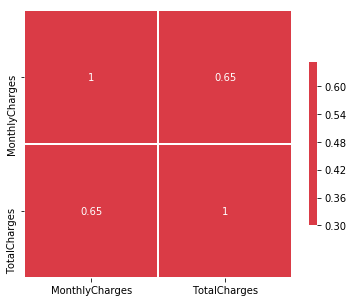

In [30]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

As expected, the MonthlyCharges and TotalCharges columns are highly correlated. So we can arbitrarily remove one of them before fitting the model as this would have no effect on learning. Let's remove TotalCharges.

In [31]:
df.drop("TotalCharges", axis=1, inplace=True)

In [32]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Tenure_Group,Churn
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,29.85,3,0
1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1,0
2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,53.85,3,1
3,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,3,1


## Barplots to Assess Categorical Variable Distribution

The sns.countplot() function plots only the counts of the values of each categorical variable. But since we're interested in creating percentage barplots (to visualize the percentage of occurence of each value for a categorical variable), let's quickly create a function to do just that.

In [33]:
def create_pc_barplot(data=df, columns=[], fig_size=(2,2), nrows=2, ncols=2, nplots=4, rotate=0, rowspace=0.2, colspace=0.3):
    fig = plt.figure(figsize=fig_size)
    for r in range(1, nplots+1):
        ax = fig.add_subplot(nrows, ncols, r)
        ax = sns.barplot(x=cols[r-1], y=cols[r-1], data=data, \
                         estimator=lambda x: len(x) / len(df) * 100)
        sns.despine(left=True, bottom=True)
        sns.set_style("whitegrid")
        ax.set_title(cols[r-1])
        ax.set_xlabel("")
        ax.set_ylabel("")
        if (r%2 != 0):
            ax.set_ylabel("percentage")
        plt.subplots_adjust(left=0.4, bottom=0.4, right=1.2, top=1.2,
                    wspace=colspace, hspace=rowspace)

Let's create the first four barplots.

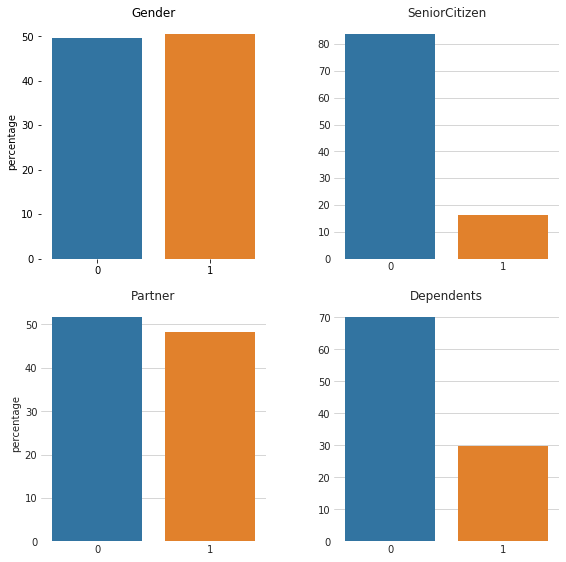

In [34]:
cols = ["Gender", "SeniorCitizen", "Partner", "Dependents"]
create_pc_barplot(df, cols, (9,9), 2, 2, 4)

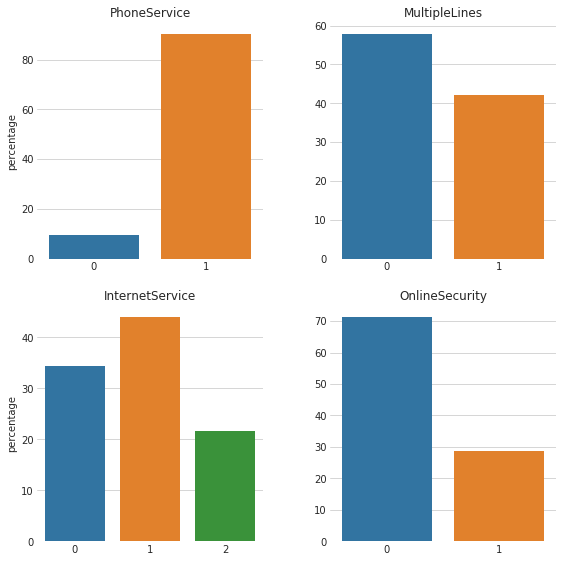

In [35]:
cols = ["PhoneService", "MultipleLines", "InternetService", \
        "OnlineSecurity"]
create_pc_barplot(df, cols, (9,9), 2, 2, 4)

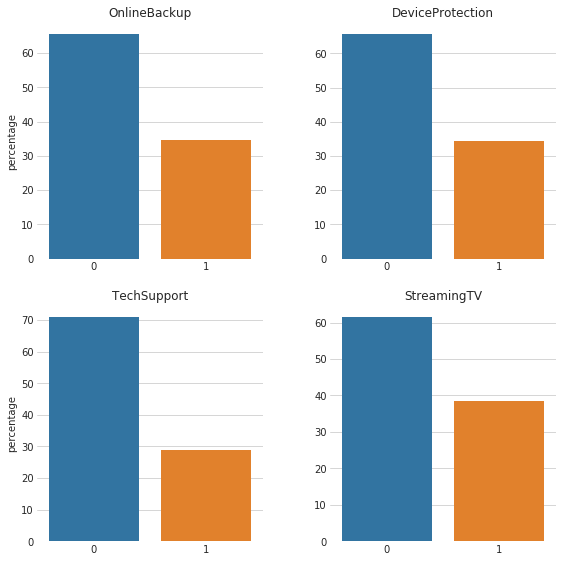

In [36]:
cols = ["OnlineBackup", "DeviceProtection", "TechSupport", \
        "StreamingTV"]
create_pc_barplot(df, cols, (9,9), 2, 2, 4)

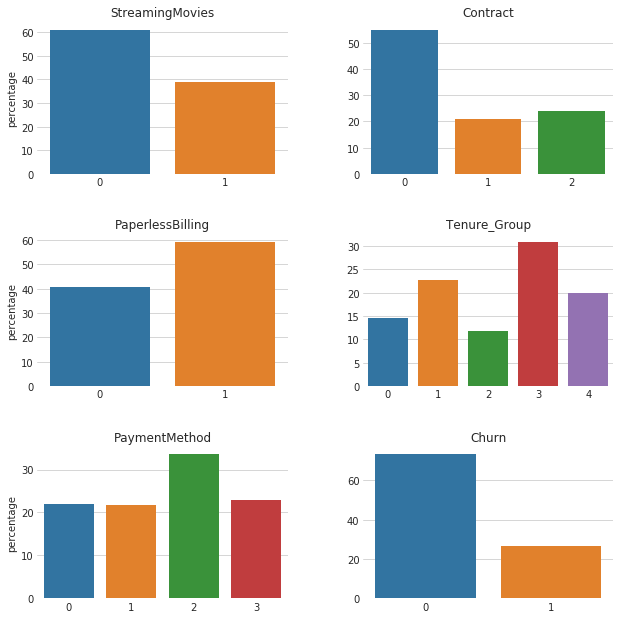

In [37]:
cols = ["StreamingMovies", "Contract", "PaperlessBilling", \
        "Tenure_Group", "PaymentMethod", "Churn"]
create_pc_barplot(df, cols, (10,10), 3, 2, 6, 0, 0.4, 0.3)

We can see from the "Churn" plot that around 28% of the customers in our dataset churned whereas the rest didn't. Furthermore, almost all of the categorical variables seem to have a fairly balanced distribution, so let's keep all of them for the modeling phase.

***

# Machine Learning

Now it's time to learn concept descriptions from our dataset so that we may be able to distinguish examples of one class (Churn = "No") from those of another (Churn = "Yes"). Once we've learnt from our historical data, we should be able to predict whether a new (previously unseen) customer will Churn or not.

# Linear Models

There's a famous quote by Leonardo da Vinci: "Simplicity is the ultimate sophistication". So we should always try simple learning methodologies first before moving on to more complex models. In that spririt, let's start with logistic regression and see how accurate a model we can get.

## Logistic Regression

### Creating Dummy Variables

In the case of logistic regression, we need to convert each variable into dummy variables, where each dummy variable is binary and is one of the values of the original variable. The number of dummy variables created for a particular variable is one less than the total number of values for that variable.

In [38]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Tenure_Group,Churn
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,29.85,3,0
1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1,0
2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,53.85,3,1
3,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,3,1


We'll now create a new version of our dataset called df_dummy in which each of the categorical variables (except the class) will be converted into one or more dummy variables.

In [39]:
cols = ["Gender", "SeniorCitizen", "Partner", "Dependents", \
        "PhoneService", "MultipleLines", "InternetService", \
        "OnlineSecurity", "OnlineBackup", "DeviceProtection", \
        "TechSupport", "StreamingTV", "StreamingMovies", "Contract", \
        "PaperlessBilling", "PaymentMethod", "Tenure_Group"]
df_dummy = pd.get_dummies(df, columns=cols, drop_first=True)

In [40]:
df_dummy.head()

,MonthlyCharges,Churn,Gender_1,SeniorCitizen_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_1,InternetService_1,InternetService_2,...,Contract_1,Contract_2,PaperlessBilling_1,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,Tenure_Group_1,Tenure_Group_2,Tenure_Group_3,Tenure_Group_4
0,29.85,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,56.95,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,53.85,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,42.30,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,70.70,1,0,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0


### Checking Independence between Predictors

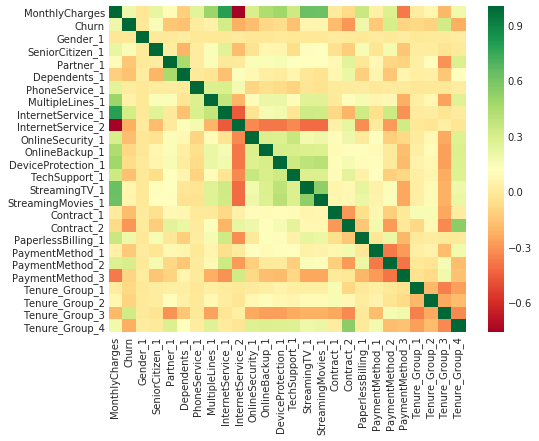

In [41]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_dummy.corr(), cmap='RdYlGn')

The diagonal in the middle shows that each categorical predictor is only strongly dependent on itself and is almost independent of the other categorical predictors. So everything looks good.

### Separating the Predictors from Response

We'll have to create two dataframes now, one containing all the predictors and the other containing only the response. This is necessary before we can proceed with the learning phase. The custom of choosing a capital letter for the predictors dataframe and a small case letter for the response dataframe will be maintained.

In [42]:
X = df_dummy.drop("Churn", axis=1)
y = df_dummy["Churn"]
print("X shape: {}".format(X.shape), "\ny shape: {}".format(y.shape))

X shape: (7032, 25) 
y shape: (7032,)


### Splitting the Data randomly into a Training and Test Set

Let's split our dataset into a randomly selected training set which includes 70% of rows in our dataset and a test set which includes the remaining 30%.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
print("X_train shape: {}".format(X_train.shape), ", X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape), ",    y_test shape: {}".format(y_test.shape))

X_train shape: (4922, 25) , X_test shape: (2110, 25)
y_train shape: (4922,) ,    y_test shape: (2110,)


### 1- The Initial Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#### 1.1- Model Fitting and Evaluation using Holdout Method

In the holdout method, we randomly split the dataset into a training and test set. Typically the training set is bigger than the test set as we have done above.

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1392  155]
 [ 270  293]]


             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1547
          1       0.65      0.52      0.58       563

avg / total       0.79      0.80      0.79      2110



#### 1.2- Model Fitting and Evaluation using Cross-validation

Cross-validation is a statistical method of evaluating generalization performance that is more stable and thorough than using a single split into a training and testing set. In cross-validation, the data is instead split repeatedly and multiple models are trained. The most commonly used version of cross-validation is 10-fold cross-validation. The function cross_val_score() takes care of splitting the data, so we only need to provide it with the dataframes X and y.

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X, y, cv=10)
print("Cross-validation scores on individual folds:\n{}".format(list(scores.round(4))))
print("\nCross-validation mean score: {}".format(scores.mean().round(4)))

Cross-validation scores on individual folds:
[0.7926, 0.8125, 0.7955, 0.8137, 0.7838, 0.7838, 0.8122, 0.808, 0.798, 0.8077]

Cross-validation mean score: 0.8008


### 2- Improving the Model using Feature Selection

Now let's try to select the most relevant and predictive features while dropping those that are less relevant and therefore either don't help in improving accuracy or deteriorate the accuracy by adding noise to the data. We'll try to select features that help us improve upon the accuracy of the base model above.

#### 2.1- Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is an iterative feature selection method, which builds a series of models with varying numbers of features. RFE starts with all features, builds a model, and discards the least important feature according to the model. Then a new model is built using all but the discarded feature, and so on until only a prespecified number of features are left. Although it's impossible to come up with the right number of predictors using random guessing, let's say we instruct the RFE model to select the best 15 features.

[False False False False False  True  True  True  True  True False False
 False  True  True  True  True  True False  True False  True  True  True
  True]


([], <a list of 0 Text yticklabel objects>)

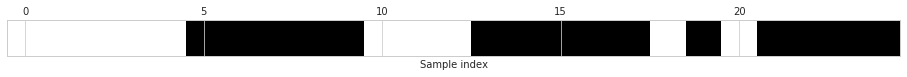

In [50]:
from sklearn.feature_selection import RFE

select = RFE(lr, n_features_to_select=15)
select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks([])

##### 2.1.1- Model Fitting and Evaluation using Holdout Method

In [51]:
X_train_rfe, X_test_rfe = X_train.loc[:,mask], X_test.loc[:,mask]

In [52]:
print("X_train_rfe shape: {}".format(X_train_rfe.shape), ", X_test_rfe shape: {}".format(X_test_rfe.shape))

X_train_rfe shape: (4922, 15) , X_test_rfe shape: (2110, 15)


Once we have filtered the features selected by RFE as shown above, we can retrain and evaluate the model with the selected features.

In [53]:
score = lr.fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.4f}".format(score))

Test score: 0.7976


Or we can simply use the model trained inside the RFE to make predictions. However here we don't need to use X_test_rfe as the model from RFE will automatically use only the feature set that was selected during training.

In [54]:
print("Test score: {:.4f}".format(select.score(X_test, y_test)))

Test score: 0.7976


#### 2.2- RFE in combination with Cross-validation for Feature Ranking (RFECV)

Instead of guessing at the right number of features to select, we can use the function RFECV which performs RFE in a cross-validation loop to find the optimal number of features automatically. So if, for example, the total number of features in our dataset is 5 and we specify _step=1_ and _cv=10_, then the function initially starts will all 5 features, learns the model from the first training fold and validates it on the corresponding test fold. It then drops one least important feature (as we specified _step=1_) and relearns the model from the same training fold while validating it on the corresponding test fold. In this way, an accuracy score is obtained by dropping each of the 5 features one by one, learning from the first training fold while validating on the corresponding test fold. This is then repeated for each the remaining 9 training and test folds. In the end, the function returns the average of the cross validation score from the 10 test folds for each possible number of features.

In [55]:
def RFECV_select_features(model):
    from sklearn.feature_selection import RFECV
    # Create the RFE object and compute a cross-validated score.
    # The "accuracy" scoring is proportional to the number of correct classifications
    select = RFECV(estimator=model, step=1, cv=10, scoring='accuracy')
    select.fit(X, y)

    # visualize the selected features:
    global mask
    mask = select.get_support()
    print(mask)
    plt.matshow(mask.reshape(1, -1), cmap='gray_r')
    plt.xlabel("Sample index")
    plt.yticks([])
    plt.show()

    # visualize # of features selected vs cross-validation accuracy:
    print("Legend: \"black\" = features selected, \"white\" = not selected\n")
    f_score_dict = {}
    for f in range(0, len(select.grid_scores_)):
        f_score_dict[f+1] = select.grid_scores_[f].round(4)
    print("\033[1m" + "Optimal number of features & accuracy: ({:d}".format(select.n_features_) + \
          ", {:.4f})".format(f_score_dict[select.n_features_]) + "\033[0m")
    print("\nNumber of features selected and corresponding accuracy is shown below and depicted in the plot:\n")
    
    print(f_score_dict)

    # Plot number of features VS. cross-validation scores
    plt.figure(figsize=(10,6))
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation accuracy")
    plt.plot(range(1, len(select.grid_scores_) + 1), select.grid_scores_)
    plt.show()

[False False  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True False  True  True  True
  True]


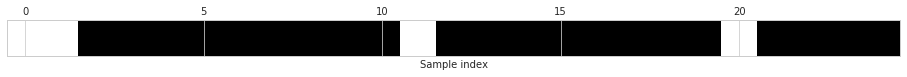

Legend: "black" = features selected, "white" = not selected

Optimal number of features & accuracy: (21, 0.8013)

Number of features selected and corresponding accuracy is shown below and depicted in the plot:

{1: 0.7342, 2: 0.7342, 3: 0.7621, 4: 0.7868, 5: 0.7868, 6: 0.7861, 7: 0.7911, 8: 0.7917, 9: 0.7945, 10: 0.7954, 11: 0.7956, 12: 0.7941, 13: 0.7929, 14: 0.7949, 15: 0.7976, 16: 0.7976, 17: 0.7986, 18: 0.8001, 19: 0.8003, 20: 0.7999, 21: 0.8013, 22: 0.8008, 23: 0.8009, 24: 0.8011, 25: 0.8008}


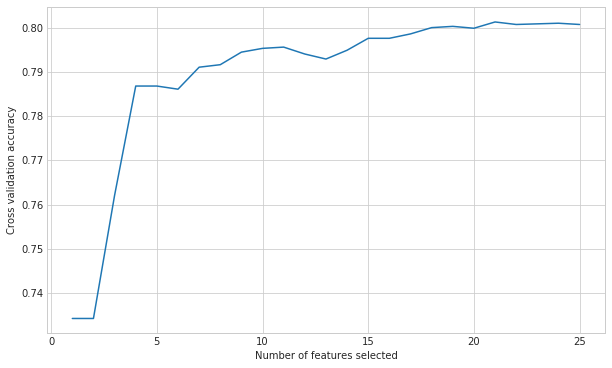

In [56]:
RFECV_select_features(lr)

For logistic regression, we can see that the accuracy seems to have improved slightly with feature selection. Although there aren't significant gains in classification accuracy, it makes sense to use only the selected features in the final model for deployment as a reduction in model complexity is also something highly desirable.

***

## Linear Discriminant Analysis

### 1- The Initial LDA Model

In [57]:
from sklearn import discriminant_analysis
lda = discriminant_analysis.LinearDiscriminantAnalysis()

#### 1.1- Model Fitting and Evaluation using Holdout Method

In [58]:
lda.fit(X_train, y_train)
predictions = lda.predict(X_test)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1385  162]
 [ 259  304]]


             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1547
          1       0.65      0.54      0.59       563

avg / total       0.79      0.80      0.79      2110



#### 1.2- Model Fitting and Evaluation using Cross-validation

In [59]:
scores = cross_val_score(lda, X, y, cv=10)
print("Cross-validation scores on individual folds:\n{}".format(list(scores.round(4))))
print("\nCross-validation mean score: {}".format(scores.mean().round(4)))

Cross-validation scores on individual folds:
[0.8011, 0.8139, 0.7926, 0.8094, 0.7781, 0.7881, 0.8137, 0.798, 0.8051, 0.7991]

Cross-validation mean score: 0.7999


### 2- Improving the Model using Feature Selection

#### 2.1- RFECV

[False False  True False False  True  True  True  True  True  True False
  True  True  True  True  True  True False  True False  True  True  True
  True]


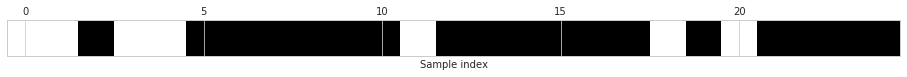

Legend: "black" = features selected, "white" = not selected

Optimal number of features & accuracy: (18, 0.8008)

Number of features selected and corresponding accuracy is shown below and depicted in the plot:

{1: 0.7189, 2: 0.7627, 3: 0.7709, 4: 0.7868, 5: 0.7834, 6: 0.785, 7: 0.7931, 8: 0.7955, 9: 0.7948, 10: 0.7955, 11: 0.7941, 12: 0.7955, 13: 0.7948, 14: 0.7961, 15: 0.7935, 16: 0.7971, 17: 0.7993, 18: 0.8008, 19: 0.8006, 20: 0.8005, 21: 0.7995, 22: 0.7993, 23: 0.7992, 24: 0.8001, 25: 0.7999}


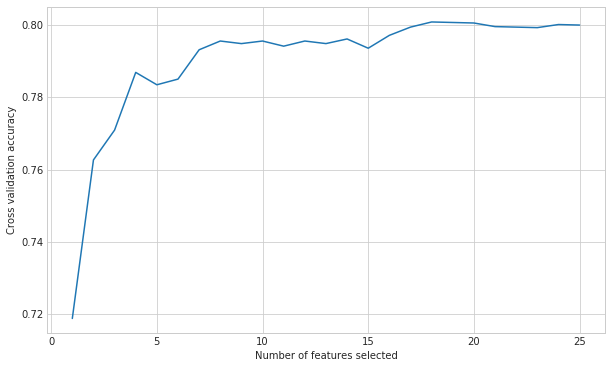

In [60]:
RFECV_select_features(lda)

We can see that there is quite a bit of similarity between the features vs accuracy plots of logistic regression and linear discriminant analysis. This doesn't come as a surprise as the basis of the model for LR and LDA is essentially the same but they have different procedures for learning the coefficients of the linear function. Despite this similarity, in the case of LDA, we can see that the number of selected features has reduced to __18__ compared to __21__ for LR while accuracy remains more or less the same. 

***

## Support Vector Machine (SVM)

### 1- The Initial SVM Model

In [61]:
from sklearn import svm
svmc = svm.SVC()

#### 1.1- Model Fitting and Evaluation using Holdout Method

In [62]:
svmc.fit(X_train, y_train)
predictions = svmc.predict(X_test)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1434  113]
 [ 335  228]]


             precision    recall  f1-score   support

          0       0.81      0.93      0.86      1547
          1       0.67      0.40      0.50       563

avg / total       0.77      0.79      0.77      2110



#### 1.2- Model Fitting and Evaluation using Cross-validation

In [63]:
scores = cross_val_score(svmc, X, y, cv=10)
print("Cross-validation scores on individual folds:\n{}".format(list(scores.round(4))))
print("\nCross-validation mean score: {}".format(scores.mean().round(4)))

Cross-validation scores on individual folds:
[0.8011, 0.7997, 0.7713, 0.8037, 0.7824, 0.7667, 0.7909, 0.7852, 0.7838, 0.7949]

Cross-validation mean score: 0.788


For the SVM classifier, we can't attempt to possibly improve the model using feature selection as it does not expose any "coef_" or "feature\_importances_" attributes.

***

# Non-linear Models

Before moving on to the non-linear appraoches below, we'll create the predictor and response dataframes once again using the original encoded dataframe as there is no need for dummy variables in the learning paradigms that follow.

### Separating the Predictors from Response

In [64]:
X = df.drop("Churn", axis=1)
y = df["Churn"]
print("X shape: {}".format(X.shape), "\ny shape: {}".format(y.shape))

X shape: (7032, 18) 
y shape: (7032,)


### Splitting the Data randomly into a Training and Test Set

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [66]:
print("X_train shape: {}".format(X_train.shape), ", X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape), ",    y_test shape: {}".format(y_test.shape))

X_train shape: (4922, 18) , X_test shape: (2110, 18)
y_train shape: (4922,) ,    y_test shape: (2110,)


***

## Decision Tree

### 1- The Initial Decision Tree Model

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

#### 1.1- Model Fitting and Evaluation using Holdout Method

In [68]:
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1228  320]
 [ 272  290]]


             precision    recall  f1-score   support

          0       0.82      0.79      0.81      1548
          1       0.48      0.52      0.49       562

avg / total       0.73      0.72      0.72      2110



#### 1.2- Model Fitting and Evaluation using Cross-validation

In [69]:
scores = cross_val_score(dtree, X, y, cv=10)
print("Cross-validation scores on individual folds:\n{}".format(list(scores.round(4))))
print("\nCross-validation mean score: {}".format(scores.mean().round(4)))

Cross-validation scores on individual folds:
[0.7088, 0.723, 0.7315, 0.7468, 0.7368, 0.6814, 0.7127, 0.7112, 0.734, 0.735]

Cross-validation mean score: 0.7221


### 2- Improving the Model using Feature Selection

#### 2.1- RFECV

[False False False False False False False False False False False False
 False  True False False  True  True]


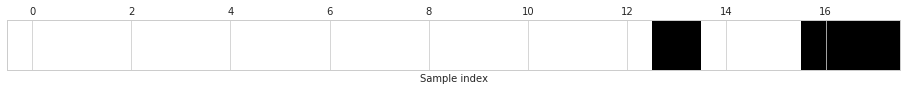

Legend: "black" = features selected, "white" = not selected

Optimal number of features & accuracy: (3, 0.7338)

Number of features selected and corresponding accuracy is shown below and depicted in the plot:

{1: 0.697, 2: 0.7183, 3: 0.7338, 4: 0.716, 5: 0.7189, 6: 0.7096, 7: 0.7136, 8: 0.7166, 9: 0.7193, 10: 0.7214, 11: 0.7161, 12: 0.7237, 13: 0.7233, 14: 0.7163, 15: 0.7169, 16: 0.7144, 17: 0.7199, 18: 0.7181}


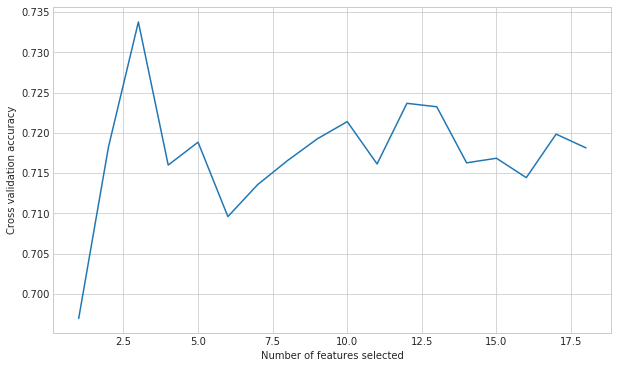

In [70]:
RFECV_select_features(dtree)

For the decision tree, we can see that RFECV reports a drastic reduction in the optimal number of features from the original feature space of __18__ to just __3__. This is obvious as decision trees are known to suffer from overfitting as the number of features increases beyond a certain point.

***

## Neural Network (NN)

### 1- The Initial NN Model

In [71]:
from sklearn import neural_network
nn = neural_network.MLPClassifier()

#### 1.1- Model Fitting and Evaluation using Holdout Method

In [72]:
nn.fit(X_train, y_train)
predictions = nn.predict(X_test)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1362  186]
 [ 284  278]]


             precision    recall  f1-score   support

          0       0.83      0.88      0.85      1548
          1       0.60      0.49      0.54       562

avg / total       0.77      0.78      0.77      2110



#### 1.2- Model Fitting and Evaluation using Cross-validation

In [73]:
scores = cross_val_score(nn, X, y, cv=10)
print("Cross-validation scores on individual folds:\n{}".format(list(scores.round(4))))
print("\nCross-validation mean score: {}".format(scores.mean().round(4)))

Cross-validation scores on individual folds:
[0.7798, 0.7798, 0.7812, 0.7909, 0.7767, 0.7326, 0.7852, 0.7724, 0.7824, 0.7863]

Cross-validation mean score: 0.7767


For the NN classifier, we can't attempt to possibly improve the model using feature selection as it does not expose any "coef_" or "feature\_importances_" attributes.

***

# Ensemble Learning

Now let's try some more complex approaches that fall in the category of ensemble learning methods. Ensemble methods learn a number of classifiers and then use a majority voting scheme to predict the class in the case of classification.

## Gradient Boosting

### 1- The Initial GB Model

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, random_state=42)

#### 1.1- Model Fitting and Evaluation using Holdout Method

In [75]:
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_test)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1392  156]
 [ 274  288]]


             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1548
          1       0.65      0.51      0.57       562

avg / total       0.79      0.80      0.79      2110



#### 1.2- Model Fitting and Evaluation using Cross-validation

In [76]:
scores = cross_val_score(gbc, X, y, cv=10)
print("Cross-validation scores on individual folds:\n{}".format(list(scores.round(4))))
print("\nCross-validation mean score: {}".format(scores.mean().round(4)))

Cross-validation scores on individual folds:
[0.8054, 0.7969, 0.7869, 0.8151, 0.7952, 0.7738, 0.8151, 0.7937, 0.7966, 0.8048]

Cross-validation mean score: 0.7984


### 2- Improving the Model using Feature Selection

#### 2.1- RFECV

[False  True False False False False  True  True  True False  True False
 False  True  True  True  True  True]


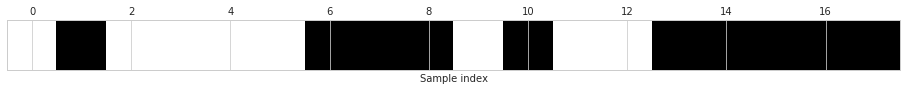

Legend: "black" = features selected, "white" = not selected

Optimal number of features & accuracy: (10, 0.7995)

Number of features selected and corresponding accuracy is shown below and depicted in the plot:

{1: 0.7339, 2: 0.7577, 3: 0.7826, 4: 0.7873, 5: 0.7927, 6: 0.7932, 7: 0.7939, 8: 0.7939, 9: 0.7947, 10: 0.7995, 11: 0.7992, 12: 0.7974, 13: 0.7984, 14: 0.7974, 15: 0.7968, 16: 0.7981, 17: 0.7992, 18: 0.7984}


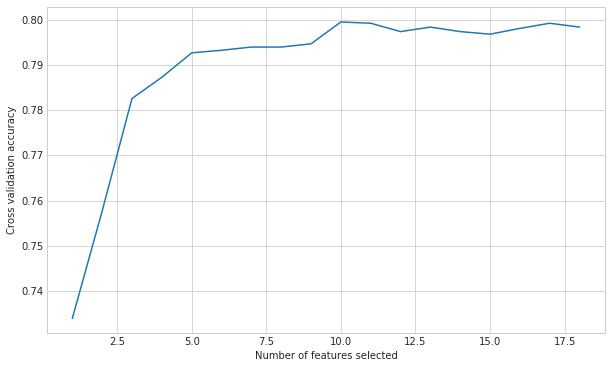

In [77]:
RFECV_select_features(gbc)

We can see that there is significant reduction in the number of selected features reported by RFECV for Gradient Boosting. The number of features has been reduced from the original feature space of __18__ to just __10__. This is coupled with the fact that classification accuracy is also very competitive in comparison with logistic regression which has turned out to be the best modeling approach so far.

***

## Random Forest

### 1- The Initial Random Forest Model

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=42)

#### 1.1- Model Fitting and Evaluation using Holdout Method

In [79]:
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1350  198]
 [ 315  247]]


             precision    recall  f1-score   support

          0       0.81      0.87      0.84      1548
          1       0.56      0.44      0.49       562

avg / total       0.74      0.76      0.75      2110



#### 1.2- Model Fitting and Evaluation using Cross-validation

In [80]:
scores = cross_val_score(rfc, X, y, cv=10)
print("Cross-validation scores on individual folds:\n{}".format(list(scores.round(4))))
print("\nCross-validation mean score: {}".format(scores.mean().round(4)))

Cross-validation scores on individual folds:
[0.7727, 0.777, 0.7784, 0.7738, 0.7738, 0.7326, 0.7824, 0.7696, 0.7809, 0.7877]

Cross-validation mean score: 0.7729


### 2- Improving the Model using Feature Selection

#### 2.1- RFECV

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


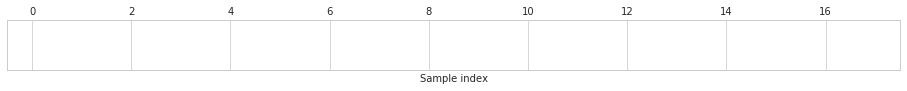

Legend: "black" = features selected, "white" = not selected

Optimal number of features & accuracy: (18, 0.7729)

Number of features selected and corresponding accuracy is shown below and depicted in the plot:

{1: 0.6833, 2: 0.7125, 3: 0.7391, 4: 0.7419, 5: 0.7435, 6: 0.7429, 7: 0.7423, 8: 0.7469, 9: 0.754, 10: 0.7592, 11: 0.7671, 12: 0.7648, 13: 0.7648, 14: 0.7673, 15: 0.7679, 16: 0.7726, 17: 0.7703, 18: 0.7729}


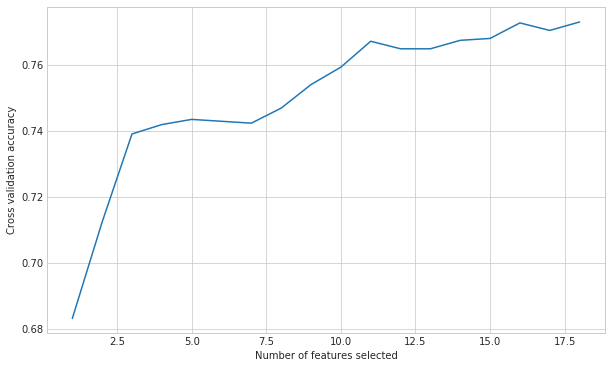

In [81]:
RFECV_select_features(rfc)

In the case of Random Forest, we can see that no feature selection has been done by RFECV, so the feature space remains the same as before and so does the accuracy.

***

## Ada Boost Classifier (ABC)

### 1- The Initial ABC Model

In [82]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=42)

#### 1.1- Model Fitting and Evaluation using Holdout Method

In [83]:
abc.fit(X_train, y_train)
predictions = abc.predict(X_test)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1370  178]
 [ 257  305]]


             precision    recall  f1-score   support

          0       0.84      0.89      0.86      1548
          1       0.63      0.54      0.58       562

avg / total       0.79      0.79      0.79      2110



#### 1.2- Model Fitting and Evaluation using Cross-validation

In [84]:
scores = cross_val_score(abc, X, y, cv=10)
print("Cross-validation scores on individual folds:\n{}".format(list(scores.round(4))))
print("\nCross-validation mean score: {}".format(scores.mean().round(4)))

Cross-validation scores on individual folds:
[0.8026, 0.8054, 0.7912, 0.8094, 0.7767, 0.7653, 0.8094, 0.7966, 0.7881, 0.8034]

Cross-validation mean score: 0.7948


### 2- Improving the Model using Feature Selection

#### 2.1- RFECV

[False False False  True  True  True  True  True  True  True  True False
 False  True  True  True  True  True]


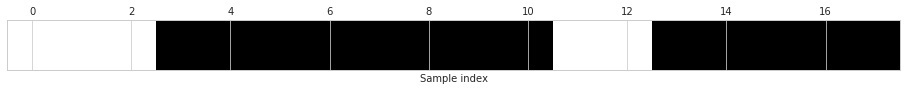

Legend: "black" = features selected, "white" = not selected

Optimal number of features & accuracy: (13, 0.7949)

Number of features selected and corresponding accuracy is shown below and depicted in the plot:

{1: 0.7339, 2: 0.776, 3: 0.7851, 4: 0.7841, 5: 0.7875, 6: 0.7902, 7: 0.7902, 8: 0.7892, 9: 0.7908, 10: 0.7922, 11: 0.7931, 12: 0.7941, 13: 0.7949, 14: 0.7948, 15: 0.7948, 16: 0.7948, 17: 0.7948, 18: 0.7948}


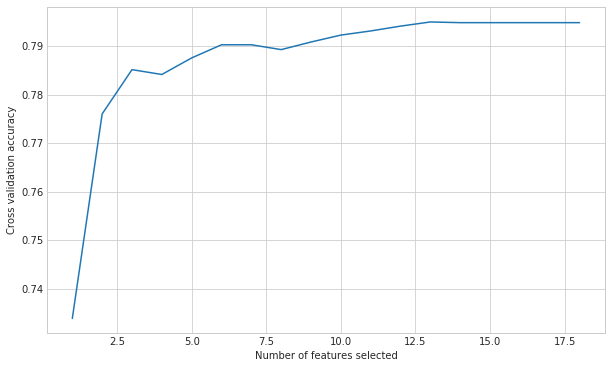

In [85]:
RFECV_select_features(abc)

For the AdaBoostClassifier, the number of features selected has been reduced to around two-thirds of the original feature space. We can also see that beyond the optimal number of features, the classification accuracy more or less remains the same.

***

# Summary

In this project, we have attempted to predict customer churn for a telecommunication company using a variety of machine learning models. We started with the simpler models and gradually progressed towards some of the more complex modeling approaches. We can draw the following conclusions from our analysis:

1. The best predictive accuracy has been obtained by using the logistic regression model. Using RFECV, the model made correct predictions for 80.13% of the test set cases using 21 of the 25 available features.
2. Linear discriminant analysis emerged as a strong competitor to logistic regression. RFECV reported a classification accuracy of 80.08% for LDA using only 18 of the 25 available features.
3. The SVM among linear modeling approaches and the Neural Network among non-linear modeling approaches resulted in more or less the same classification accuracy.
4. The decision tree model resulted in the worst accuracy from amongst all non-linear modeling approaches used.
5. From among the ensemble modeling approaches, the Gradient Boosting model emerged as a strong competitor to both LR and LDA. RFECV reported a classification accuracy of 79.95% for the model and it used only 10 of the 18 available features which is the highest feature reduction among all the models used.

# Conclusion

It appears that LDA may be the correct modeling approach for this particular problem. Even though Gadient Boosting used the lowest number of features to give almost the same classification accuracy as LDA, it's still an ensemble learning method which is not only more complex but also requires more time to learn from data. We can now go ahead and relearn the chosen model LDA from all available data (without splitting into training and test sets) and deploy the model into production.